In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.metrics import mean_squared_error as MSE
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("/content/Database Tether 9.csv")
print(data.head())

   ultimo_3  maximo_3  minimo_3  ultimo_2  maximo_2  minimo_2  ultimo_1  \
0    1.0007    1.0021    0.9936    1.0021    1.0036    0.9973    1.0029   
1    1.0021    1.0036    0.9973    1.0029    1.0036    1.0003    1.0014   
2    1.0029    1.0036    1.0003    1.0014    1.0034    1.0014    1.0022   
3    1.0014    1.0034    1.0014    1.0022    1.0033    0.9988    1.0026   
4    1.0022    1.0033    0.9988    1.0026    1.0047    1.0022    1.0045   

   maximo_1  minimo_1  esperado  
0    1.0036    1.0003    1.0014  
1    1.0034    1.0014    1.0022  
2    1.0033    0.9988    1.0026  
3    1.0047    1.0022    1.0045  
4    1.0047    1.0021    1.0039  


          ultimo_3  maximo_3  minimo_3  ultimo_2  maximo_2  minimo_2  \
ultimo_3  1.000000  0.753274  0.811173  0.840679  0.800420  0.802834   
maximo_3  0.753274  1.000000  0.582485  0.686530  0.665728  0.566820   
minimo_3  0.811173  0.582485  1.000000  0.713997  0.554853  0.749464   
ultimo_2  0.840679  0.686530  0.713997  1.000000  0.753394  0.815484   
maximo_2  0.800420  0.665728  0.554853  0.753394  1.000000  0.585935   
minimo_2  0.802834  0.566820  0.749464  0.815484  0.585935  1.000000   
ultimo_1  0.773369  0.619818  0.660188  0.841130  0.686851  0.720485   
maximo_1  0.650562  0.599440  0.539608  0.800633  0.665951  0.559541   
minimo_1  0.697745  0.537970  0.648452  0.803665  0.567634  0.749581   
esperado  0.747863  0.601908  0.645900  0.774214  0.620420  0.668081   

          ultimo_1  maximo_1  minimo_1  esperado  
ultimo_3  0.773369  0.650562  0.697745  0.747863  
maximo_3  0.619818  0.599440  0.537970  0.601908  
minimo_3  0.660188  0.539608  0.648452  0.645900  
ult

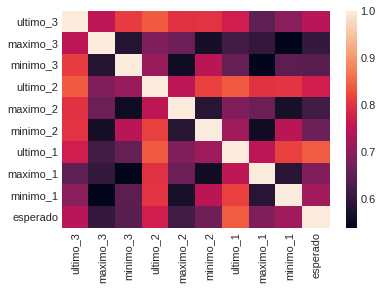

In [ ]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [ ]:
x = data[["ultimo_3", "maximo_3", "minimo_3", "ultimo_2", "maximo_2", "minimo_2", "ultimo_1", "maximo_1", "minimo_1"]]
y = data["esperado"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [ ]:
data = pd.DataFrame(data={"Previsão": ypred.flatten()})
print(data)

     Previsão
0      1.0003
1      1.0121
2      1.0037
3      1.0001
4      1.0003
..        ...
214    1.0006
215    1.0003
216    1.0004
217    1.0013
218    0.9989

[219 rows x 1 columns]


In [ ]:
erro = y - ypred
erro = pd.DataFrame(data={"Erro": erro.flatten()})
print(erro[0:219])

       Erro
0    0.0011
1   -0.0107
2   -0.0023
3    0.0013
4    0.0011
..      ...
214  0.0008
215  0.0011
216  0.0010
217  0.0001
218  0.0025

[219 rows x 1 columns]


In [ ]:
mse_dt = MSE(ytest, ypred)
rmse_dt = mse_dt**(1/2)
print("RMSE: ", rmse_dt)

RMSE:  0.0013130535362433206


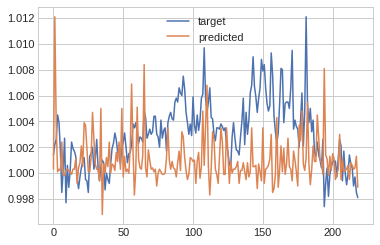

In [ ]:
from pylab import plot, show, legend, title, xlabel, ylabel, axis
Target = y[0:219]
Predicted = ypred
plt.plot(Target, label= "target")
plt.plot(Predicted, label= "predicted")
plt.legend()
plt.show()